Hanane EL AISSAOUI

# Metro Bike share

# 1. Importation des bibliothèques et des données:

La première étape consiste à l'importation des bibliothèques nécessaires et l'importation du fichier "final-bike-sharing-2017-2020.csv"

In [1174]:
import pandas as pd  # importation de la bibliothèque pandas
import numpy as np  # importation de la bibliothèque numpy
import matplotlib.pyplot as plt # importation de la bibliothèque matplotlib
import seaborn as sns # importation de la bibliothèque seaborn

In [1176]:
# chargement du fichier "final-bike-sharing-2017-2020.csv" dans le dataframe data
data = pd.read_csv("final-bike-sharing-2017-2020.csv")

# 2. Affichage des informations, nettoyage et préparation des données:

Cette 2ème étape consiste à avoir quelques informations sur les données notamment la dimension du fichier, le nombre des doublons et le nombre des champs vides.

## 2.1 Informations générales du dataframe : 

In [1180]:
# affichage des 5 premières lignes du dataframe
data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,start_region,start_status,end_station_name,end_day_of_go_live_date,end_region,end_status,start_address_zip_code,start_total_docks,end_address_zip_code,end_total_docks
0,17059131,480,1/1/2017 0:15,1/1/2017 0:23,3030,34.051941,-118.24353,3029,34.048851,-118.246422,...,DTLA,Active,Main & 4th,7/7/2016,DTLA,Active,90012,29,90013,24
1,17324498,180,1/5/2017 19:31,1/5/2017 19:34,3030,34.051941,-118.24353,3029,34.048851,-118.246422,...,DTLA,Active,Main & 4th,7/7/2016,DTLA,Active,90012,29,90013,24
2,17629331,360,1/10/2017 11:33,1/10/2017 11:39,3030,34.051941,-118.24353,3029,34.048851,-118.246422,...,DTLA,Active,Main & 4th,7/7/2016,DTLA,Active,90012,29,90013,24
3,17699949,1380,1/11/2017 13:14,1/11/2017 13:37,3030,34.051941,-118.24353,3029,34.048851,-118.246422,...,DTLA,Active,Main & 4th,7/7/2016,DTLA,Active,90012,29,90013,24
4,18326855,420,1/21/2017 12:15,1/21/2017 12:22,3030,34.051941,-118.24353,3029,34.048851,-118.246422,...,DTLA,Active,Main & 4th,7/7/2016,DTLA,Active,90012,29,90013,24


In [1181]:
# affichage du nombre de lignes et colonnes du dataframe :
data.shape

(857909, 27)

=> on a 857909 lignes et 27 colonnes dans le dataframe

In [1183]:
# affichage des noms des colonnes du dataframe
data.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'start_day_of_go_live_date',
       'start_region', 'start_status', 'end_station_name',
       'end_day_of_go_live_date', 'end_region', 'end_status',
       'start_address_zip_code', 'start_total_docks', 'end_address_zip_code',
       'end_total_docks'],
      dtype='object')

In [1375]:
# affichage des informations de la colonne start_station_name (pour avoir une idée sur les données)
data['start_station_name'].value_counts()

start_station_name
7th & Flower                 41053
Main & 1st                   32532
Union Station West Portal    29311
Ocean Front Walk & Navy      28588
7th & Spring                 25089
                             ...  
Expo/Bundy E Line Station       68
Vineland & Oxnard               63
Victory & Colfax                48
Burbank & Cahuenga              43
Venice & Abbot Kinney           28
Name: count, Length: 201, dtype: int64

In [1377]:
# affichage des informations de la colonne bike_type (pour avoir une idée sur les données)
data['bike_type'].value_counts()

bike_type
Unknown     363827
standard    296915
electric    165446
smart        31645
Name: count, dtype: int64

In [1379]:
# affichage des informations de la colonne bike_type (pour avoir une idée sur les données)
data['passholder_type'].value_counts()

passholder_type
Monthly Pass    508065
Walk-up         247992
One Day Pass     43530
Annual Pass      38764
Flex Pass        14969
Unknown           4460
Testing             53
Name: count, dtype: int64

In [1373]:
# affichage des informations de la colonne trip_route_category (pour avoir une idée sur les données)
data['trip_route_category'].value_counts()

trip_route_category
One Way       723831
Round Trip    134002
Name: count, dtype: int64

In [1184]:
# affichage du nombre de doublons du dataframe pour voir s'il y a des lignes à supprimer
data.duplicated().sum()

0

==> le nombre de doublons est 0 donc aucune ligne n'est à supprimer à cette étape

## 2.2 Champs vides : 

In [1187]:
# affichage du nombre des champs vide pour chaque colonne pour voir s'il y a des champs à renseigner
data.isnull().sum()

trip_id                           0
duration                          0
start_time                        0
end_time                          0
start_station                     0
start_lat                         0
start_lon                         0
end_station                       0
end_lat                           0
end_lon                           0
bike_id                           0
plan_duration                   186
trip_route_category               0
passholder_type                4461
bike_type                    363833
start_station_name                0
start_day_of_go_live_date         0
start_region                      0
start_status                      0
end_station_name                  0
end_day_of_go_live_date           0
end_region                        0
end_status                        0
start_address_zip_code            0
start_total_docks                 0
end_address_zip_code              0
end_total_docks                   0
dtype: int64

==> 3 colonnes contiennent des champs vides, pour une meilleure analyse des données, il est nécessaire de renseigner ces champs

In [1189]:
# remplissage des champs vides dans les colonnes plan_duration, passholder_type et bike_type
data['plan_duration'].fillna(data['plan_duration'].mean(), inplace=True) # remplissage des champs vides dans plan_duration par la moyenne
data['passholder_type'].fillna('Unknown', inplace=True) # remplissage du passholder_type par la 'Unkown'
data['bike_type'].fillna('Unknown', inplace=True) # remplissage du bike_type par la 'Unkown'

C:\Users\hanan\AppData\Local\Temp\ipykernel_77516\1906318879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['plan_duration'].fillna(data['plan_duration'].mean(), inplace=True) # remplissage des champs vides dans plan_duration par la moyenne
C:\Users\hanan\AppData\Local\Temp\ipykernel_77516\1906318879.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because 

In [1190]:
# vérification du remplissage des champs vides
data.isnull().sum()

trip_id                      0
duration                     0
start_time                   0
end_time                     0
start_station                0
start_lat                    0
start_lon                    0
end_station                  0
end_lat                      0
end_lon                      0
bike_id                      0
plan_duration                0
trip_route_category          0
passholder_type              0
bike_type                    0
start_station_name           0
start_day_of_go_live_date    0
start_region                 0
start_status                 0
end_station_name             0
end_day_of_go_live_date      0
end_region                   0
end_status                   0
start_address_zip_code       0
start_total_docks            0
end_address_zip_code         0
end_total_docks              0
dtype: int64

==> les champs ont bien été renseignés

## 2.3 Types des données :

In [1193]:
# affichage des types de données de chaque colonne pour vérifier leur cohérence
data.dtypes

trip_id                        int64
duration                       int64
start_time                    object
end_time                      object
start_station                  int64
start_lat                    float64
start_lon                    float64
end_station                    int64
end_lat                      float64
end_lon                      float64
bike_id                        int64
plan_duration                float64
trip_route_category           object
passholder_type               object
bike_type                     object
start_station_name            object
start_day_of_go_live_date     object
start_region                  object
start_status                  object
end_station_name              object
end_day_of_go_live_date       object
end_region                    object
end_status                    object
start_address_zip_code         int64
start_total_docks              int64
end_address_zip_code           int64
end_total_docks                int64
d

==> On remarque qu'il y a 4 colonnes dates start_time, end_time, start_day_of_go_live_date et end_day_of_go_live_date qui sont en de type object.

In [1195]:
# affichage des premières 100 lignes de la colonne start_time pour voir le format des dates
data['start_time'].head(100)

0           1/1/2017 0:15
1          1/5/2017 19:31
2         1/10/2017 11:33
3         1/11/2017 13:14
4         1/21/2017 12:15
             ...         
95    2017-10-28 11:23:00
96    2017-10-25 08:46:00
97    2017-10-25 12:54:00
98    2018-01-02 11:49:00
99    2018-01-03 10:02:00
Name: start_time, Length: 100, dtype: object

In [1196]:
# affichage des premières 100 lignes de la colonne end_time pour voir le format des dates
data['end_time'].head(100)

0           1/1/2017 0:23
1          1/5/2017 19:34
2         1/10/2017 11:39
3         1/11/2017 13:37
4         1/21/2017 12:22
             ...         
95    2017-10-28 11:26:00
96    2017-10-25 08:49:00
97    2017-10-25 12:58:00
98    2018-01-02 11:52:00
99    2018-01-03 10:05:00
Name: end_time, Length: 100, dtype: object

In [1198]:
# affichage des premières 100 lignes de la colonne start_day_of_go_live_date pour voir le format des dates
data['start_day_of_go_live_date'].head(100)

0     7/7/2016
1     7/7/2016
2     7/7/2016
3     7/7/2016
4     7/7/2016
        ...   
95    7/7/2016
96    7/7/2016
97    7/7/2016
98    7/7/2016
99    7/7/2016
Name: start_day_of_go_live_date, Length: 100, dtype: object

In [1202]:
# affichage des premières 100 lignes de la colonne end_day_of_go_live_date pour voir le format des dates
data['end_day_of_go_live_date'].head(100)

0     7/7/2016
1     7/7/2016
2     7/7/2016
3     7/7/2016
4     7/7/2016
        ...   
95    7/7/2016
96    7/7/2016
97    7/7/2016
98    7/7/2016
99    7/7/2016
Name: end_day_of_go_live_date, Length: 100, dtype: object

==> Les colonnes start_time et end_time doivent être converties en type datetime car elles contiennent des données de type datetime et non des chaines de caractères.

==> Les colonnes start_day_of_go_live_date et end_day_of_go_live_date doivent être converties en type date car elles contiennent des données de type date et non des chaines de caractères.

==> On remarque qu'il y a 2 formats de dates pour les colonnes start_time et end_time : 'M/D/YYYY HH:MM' et 'YYYY-MM-DD HH:MM:DD'

In [1204]:
# conversion les valeurs des colonnes start_time et end_time de chaine de caractère au format datetime
data['start_time'] = pd.to_datetime(data['start_time'], format='mixed') # on ajoute format = 'mixed' pour une conversion correcte parce qu'il y plusieurs formats de date
data['end_time'] = pd.to_datetime(data['end_time'], format='mixed') # on ajoute format = 'mixed' pour une conversion correcte parce qu'il y plusieurs formats de date

In [1205]:
# conversion les valeurs des colonnes start_day_of_go_live_date et end_day_of_go_live_date de chaine de caractère au format datetime
data['start_day_of_go_live_date'] = pd.to_datetime(data['start_day_of_go_live_date'])
data['end_day_of_go_live_date'] = pd.to_datetime(data['end_day_of_go_live_date'])

In [1206]:
# vérification de la mise à jour du type des colonnes start_time, end_time, start_day_of_go_live_date, end_day_of_go_live_date
data[['start_time','end_time','start_day_of_go_live_date','end_day_of_go_live_date']].dtypes

start_time                   datetime64[ns]
end_time                     datetime64[ns]
start_day_of_go_live_date    datetime64[ns]
end_day_of_go_live_date      datetime64[ns]
dtype: object

==> les 4 colonnes ont bien été converties en format datetime et date

## 2.4 Ajout des colonnes nécessaires pour l'analyse des données :

Dans la colonne "duration" dans le dataframe, on constate à première vue que les données ne sont pas cohérentes : certaines lignes indiquent la durée en secondes (les premières lignes), tandis que d'autres l'indiquent en minutes (les dernières lignes). Pour résoudre ce problème, on va créer une nouvelle colonne 'duration_minutes' qui convertira toutes les durées en minutes. Ensuite, on va comparer cette nouvelle colonne avec la colonne existante 'duration' pour vérifier la validité de notre hypothèse.

In [1211]:
# calcul de la durée des trajets en minutes
duration_minutes  = (data['end_time'] - data['start_time']).dt.total_seconds() / 60
data.insert(2, 'duration_minutes', duration_minutes) # on insère dans l'index 2 afin de faciliter la comparaison avec la colonne 'duration' déjà existante.

In [1213]:
# affichage des 100 premières lignes
data.head(100)

,trip_id,duration,duration_minutes,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,...,start_region,start_status,end_station_name,end_day_of_go_live_date,end_region,end_status,start_address_zip_code,start_total_docks,end_address_zip_code,end_total_docks
0,17059131,480,8.0,2017-01-01 00:15:00,2017-01-01 00:23:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24
1,17324498,180,3.0,2017-01-05 19:31:00,2017-01-05 19:34:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24
2,17629331,360,6.0,2017-01-10 11:33:00,2017-01-10 11:39:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24
3,17699949,1380,23.0,2017-01-11 13:14:00,2017-01-11 13:37:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24
4,18326855,420,7.0,2017-01-21 12:15:00,2017-01-21 12:22:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54795659,3,3.0,2017-10-28 11:23:00,2017-10-28 11:26:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24
96,54065945,3,3.0,2017-10-25 08:46:00,2017-10-25 08:49:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24
97,54104471,4,4.0,2017-10-25 12:54:00,2017-10-25 12:58:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24
98,65632234,3,3.0,2018-01-02 11:49:00,2018-01-02 11:52:00,3030,34.051941,-118.24353,3029,34.048851,...,DTLA,Active,Main & 4th,2016-07-07,DTLA,Active,90012,29,90013,24


==> comme on peut le remarquer les premières lignes de 'duration' sont en secondes et à partir de la ligne 95 sont en minutes donc on va supprimer cette colonne et ne garder que la colonne 'duration_minutes' qu'on vient de créer

In [1216]:
# suppression de la colonne duration
data = data.drop('duration', axis=1)

In [1219]:
# calcul des statistiques de durée des trajets
duration_stats = data['duration_minutes'].describe()
print(duration_stats)

count    857909.000000
mean         31.025916
std         134.149608
min         -54.000000
25%           6.000000
50%          12.000000
75%          24.000000
max       18714.000000
Name: duration_minutes, dtype: float64


==> On remarque que le min de duration_time = -54 qui est une valeur abérante car une durée ne peut pas être négative, on supprime alors toutes les valeurs négatives de cette colonne.

In [1225]:
# affichage des valeurs négatives de duration_minutes
data[data['duration_minutes'] <= 0]['duration_minutes']

1705       0.0
1719       0.0
26267      0.0
26305      0.0
26337      0.0
          ... 
853694     0.0
856408     0.0
857395   -10.0
857398   -11.0
857843     0.0
Name: duration_minutes, Length: 76, dtype: float64

In [1226]:
# suppression des valeurs négatives de duration_minutes
data = data[data['duration_minutes'] > 0]

In [1227]:
# test de suppression
data[data['duration_minutes'] <= 0]['duration_minutes']

Series([], Name: duration_minutes, dtype: float64)

## 2.5 Suppression des colonnes qui ne sont pas nécessaires pour l'analyse :

Pour comprendre le comportement des usagers cyclistes et améliorer le service, il y a des colonnes pertinentes et d'autres qui ne le sont pas. Pour cela, on va garder uniquement les colonnes utiles afin d'améliorer les performances, réduire le temps de traitement et économiser de la mémoire.

In [1230]:
# les 19 colonnes à garder 
data = data[['duration_minutes', 'start_time', 'end_time', 'start_station', 'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon', 'plan_duration','trip_route_category', 'passholder_type', 'bike_type', 
    'start_station_name', 'end_station_name', 'start_region', 'end_region', 'start_total_docks','end_total_docks']]

In [1231]:
data.shape

(857833, 19)

# 3 Analyse des données :

## 3.1 Analyse par durée de trajet : (duration_minutes)

In [1234]:
# affichage des informations statistiques de duration_minutes
data['duration_minutes'].describe()

count    857833.000000
mean         31.029030
std         134.155085
min           0.016667
25%           6.000000
50%          12.000000
75%          24.000000
max       18714.000000
Name: duration_minutes, dtype: float64

==> 75% des trajets sont à 24 min maximum
==> puisque l'écart type est très élevé 134.15 alors on constate que les durées des trajets sont très dispersées autour de la moyenne, donc on va faire une analyse en parties pour une meilleur visibilité des diagrammes:
1. durée entre 0 et 60 minutes
2. durée entre 60 et 120 minutes

   
==> le min est égal à 0.01 minutes ce qui peut s'agir d'une faute de saisie
==> le max est égal à 18714 minutes = 311,9 heures ce qui peut signifier que l'utilisateur n'a pas retourné le vélo à la station, ce qui lui coutera des frais supplémentaires

### 3.1.1 Analyse par durée de trajet : (0 < duration_minutes < 60) 

In [1237]:
# calcul du nombre total de trajets
total_trajets = len(data['duration_minutes'])

# Calcul du nombre de trajets avec une durée inférieure à 60 minutes
trajets_moins_60 = data[data['duration_minutes'] < 60]['duration_minutes'].count()

# Calcul du pourcentage des trajets moins de 60 minutes par rapport au total des trajets
pourcentage_moins_60 = (trajets_moins_60 / total_trajets) * 100

print(f"Pourcentage des trajets de moins de 60 minutes : {pourcentage_moins_60:.2f}%")


Pourcentage des trajets de moins de 60 minutes : 91.63%


==> On remarque que la grande majorité des trajets est inférieur à 60 minutes ce qui représente des trajets courts et moyens

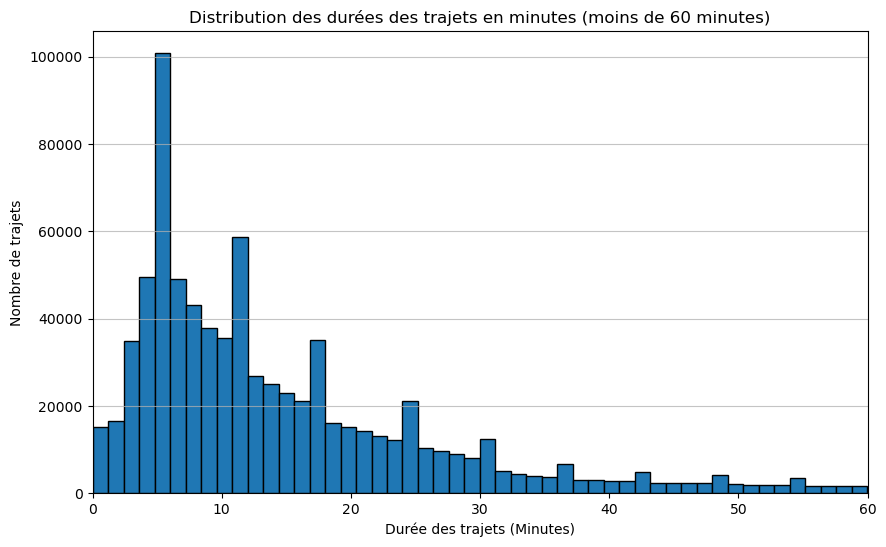

In [1383]:
# création de l'histogramme 

plt.figure(figsize=(10, 6))
plt.hist(data[data['duration_minutes'] < 60]['duration_minutes'], bins=50, edgecolor='black')
plt.title('Distribution des durées des trajets en minutes (moins de 60 minutes)')
plt.xlabel('Durée des trajets (Minutes)')
plt.ylabel('Nombre de trajets')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 60)  # axe des x entre 0 et 60 minutes 
plt.show()

==> La majorité des trajets ont une durée très courte, avec un pic important autour de 5 minutes (plus de 100 000 trajets). Cela suggère que les utilisateurs préfèrent les trajets rapides, généralement pour des déplacements courts et pratiques.

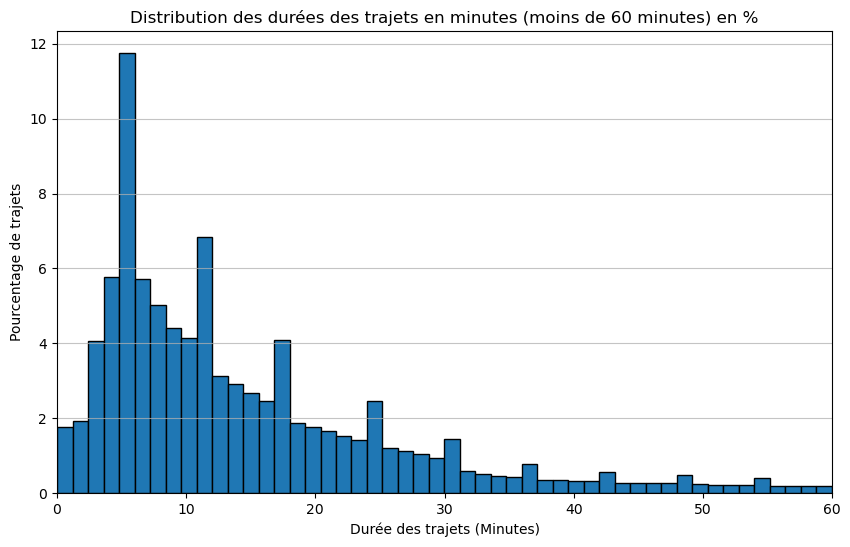

In [1241]:
# calcul du nombre total de trajets
total_trajets = len(data['duration_minutes'])

# création de l'histogramme 
plt.figure(figsize=(10, 6))
plt.hist(data[data['duration_minutes'] < 60]['duration_minutes'], 
         bins=50, 
         edgecolor='black', 
         weights=[100/total_trajets] * len(data[data['duration_minutes'] < 60]))  # en pourcentage

plt.title('Distribution des durées des trajets en minutes (moins de 60 minutes) en %')
plt.xlabel('Durée des trajets (Minutes)')
plt.ylabel('Pourcentage de trajets')  # en pourcentage
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 60)  # axe des x entre 0 et 60 minutes 
plt.show()


### 3.1.2 Analyse par durée de trajet : (60 < duration_minutes < 120) 

In [1243]:
# calcul du nombre total de trajets
total_trajets = len(data['duration_minutes'])

# calcul du nombre de trajets avec une durée inférieure à 60 minutes
trajets_plus_60_moins_120 = data[(data['duration_minutes'] > 60) & (data['duration_minutes'] < 120)]['duration_minutes'].count()

# calcul du pourcentage des trajets moins de 60 minutes par rapport au total des trajets
pourcentage_plus_60_moins_120 = (trajets_plus_60_moins_120 / total_trajets) * 100

print(f"Pourcentage des trajets de moins de 60 minutes : {pourcentage_plus_60_moins_120:.2f}%")


Pourcentage des trajets de moins de 60 minutes : 4.88%


==> On remarque qu'une très petite proportion des trajets dure entre 60 et 120 minutes, ce qui correspond à des trajets de durée moyenne.

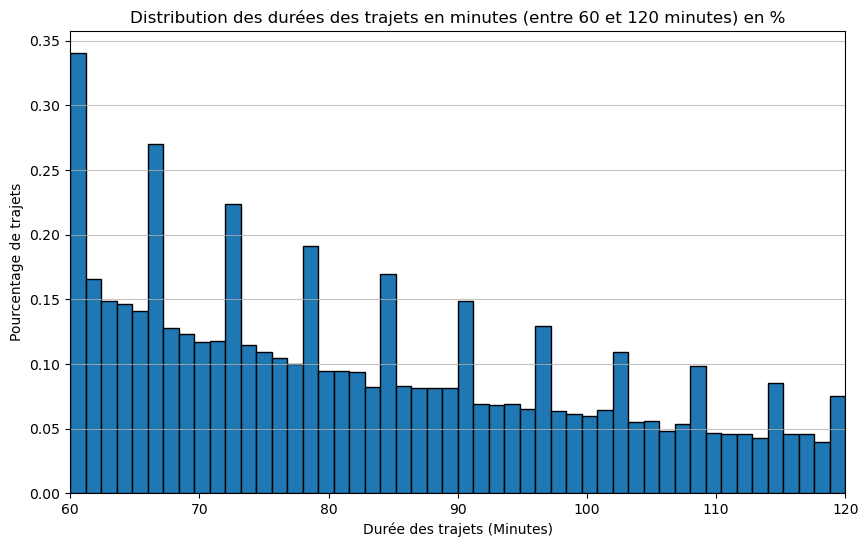

In [1245]:
# calcul du nombre total de trajets
total_trajets = len(data['duration_minutes'])

# création de l'histogramme 
plt.figure(figsize=(10, 6))
plt.hist(data[(data['duration_minutes'] >= 60) & (data['duration_minutes'] <= 120)]['duration_minutes'], 
         bins=50, 
         edgecolor='black', 
         weights=[100/total_trajets] * len(data[(data['duration_minutes'] >= 60) & (data['duration_minutes'] <= 120)]))  # en pourcentage

plt.title('Distribution des durées des trajets en minutes (entre 60 et 120 minutes) en %')
plt.xlabel('Durée des trajets (Minutes)')
plt.ylabel('Pourcentage de trajets')  # en pourcentage
plt.grid(axis='y', alpha=0.75)
plt.xlim(60, 120)  # Axe des x entre 60 et 120 minutes 
plt.show()

==> dans cette première analyse par durée de trajet, on constate que les trajets courts sont les plus utilisés par les clients et afin d'améliorer le services j'ai plusieurs propositions à mettre en place :

1) proposer des offres spécifiques pour les trajets courts, comme des réductions pour encourager encore plus l'utilisation des trajets quotidiens rapides.
2) Augmenter la disponibilité des vélos pour les trajets courts.

## 3.2 Analyse par stations de départ: (start_station_name)

In [1248]:
# affichage des valeurs de start_station_name
data['start_station_name'].value_counts()

start_station_name
7th & Flower                 41053
Main & 1st                   32532
Union Station West Portal    29311
Ocean Front Walk & Navy      28588
7th & Spring                 25089
                             ...  
Expo/Bundy E Line Station       68
Vineland & Oxnard               63
Victory & Colfax                48
Burbank & Cahuenga              43
Venice & Abbot Kinney           28
Name: count, Length: 201, dtype: int64

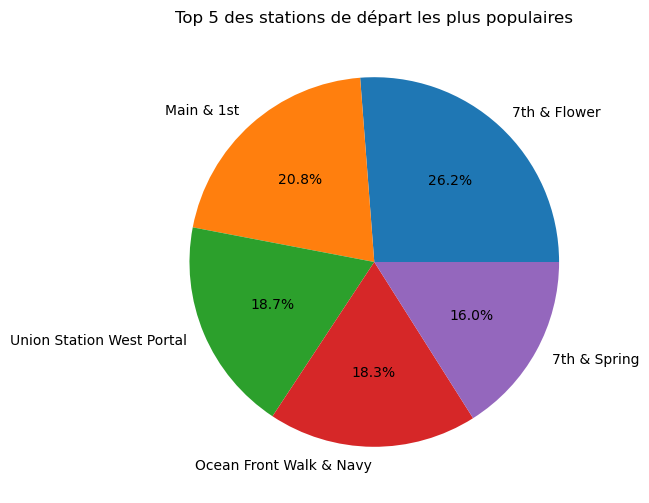

In [1249]:
# top 5 stations de départ les plus populaires
popular_start_stations = data['start_station_name'].value_counts().head(5)

# création du graphique en secteur pour les top 5 stations de départ les plus populaires
plt.figure(figsize=(10, 6))
popular_start_stations.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 des stations de départ les plus populaires')
plt.ylabel('')  # Enlever le label de l'axe y pour un pie chart
plt.show()

==> La station "7th & Flower" est la station la plus populaire, représentant 15.7% des trajets parmi les 10 premières stations.

==> Les stations "Main & 1st" et "Union Station West Portal" figurent également en tête des préférences des utilisateurs.

==> Il existe une répartition relativement équilibrée des trajets pour les autres stations, ce qui montre une utilisation variée à travers les différentes zones.

==> dans cette analyse par station de départ j'ai quelques propositions à mettre en place afin d'améliorer le services :

1. Ajouter plus de vélos aux stations les plus utilisés comme "7th & Flower",  "Main & 1st" et  "Union Station West Portal".
2. Embaucher des équipes responsables de la réallocation des vélos entre les stations : pour transférer des vélos des stations où il y en a en surplus vers celles qui sont à court de vélos.

## 3.2 Analyse par stations d'arrivée: (end_station_name)

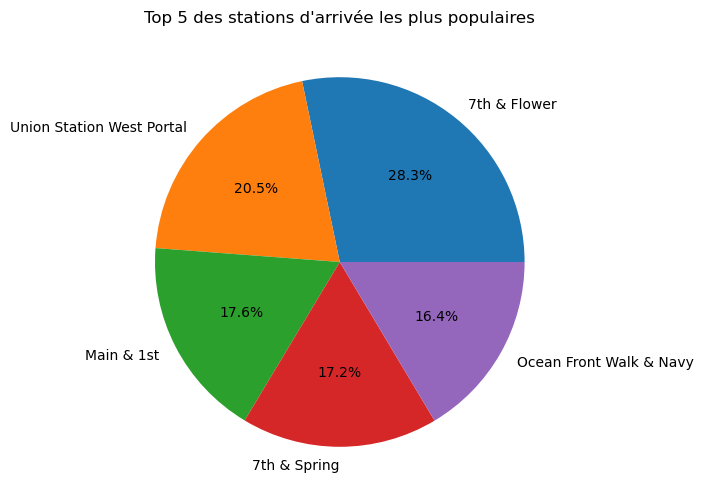

In [1253]:
# top 5 stations d'arrivée les plus populaires
popular_end_stations = data['end_station_name'].value_counts().head(5)

# création du graphique en secteur pour les top 5 stations d'arrivée les plus populaires
plt.figure(figsize=(10, 6))
popular_end_stations.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 des stations d\'arrivée les plus populaires')
plt.ylabel('')  # Enlever le label de l'axe y pour un pie chart
plt.show()

==> La station "7th & Flower" est la station la plus populaire, représentant 16.5% des trajets parmi les 10 premières stations.

==> Les stations "Main & 1st" et "Union Station West Portal" figurent également en tête des préférences des utilisateurs.

==> Il existe une répartition relativement équilibrée des trajets pour les autres stations, ce qui montre une utilisation variée à travers les différentes zones.

==> dans cette analyse par station d'arrivé j'ai quelques propositions à mettre en place afin d'améliorer le services :

1. Ajouter plus de docks dans les stations populaires, pour ne pas avoir des situations où l'utilisateur souhaite remettre le vélo et ne trouve pas de places, ce qui peut lui causer des coûts supplémentaires.
2. Installer des systèmes de surveillance pour anticiper les besoins dans le cas où les docks sont tous occupés.
3. Ajouter des stations supplémentaires à proximité des stations populaires pour permettre aux utilisateurs de déposer leurs vélos sans avoir à se déplacer trop loin lorsqu'une station est pleine.

## 3.3 Analyse par stations d'arrivée + nombre de docks: (end_station_name + end_total_docks)

In [1257]:
# affichage du max(end_total_docks)
data['end_total_docks'].max()

36

In [1258]:
# affichage des stations d'arrivée avec le maximum de nombre de docks
data[data['end_total_docks'] == data['end_total_docks'].max()]['end_station_name'].unique()

array(['Pico & Flower'], dtype=object)

==> la station 'Pico & Flower' ne figure pas parmi les top 10 station d'arrivée les plus populaires. Normalement le max doit être dans les stations d'arrivée les plus populaires comme "7th & Flower", "Main & 1st" et "Union Station West Portal"...

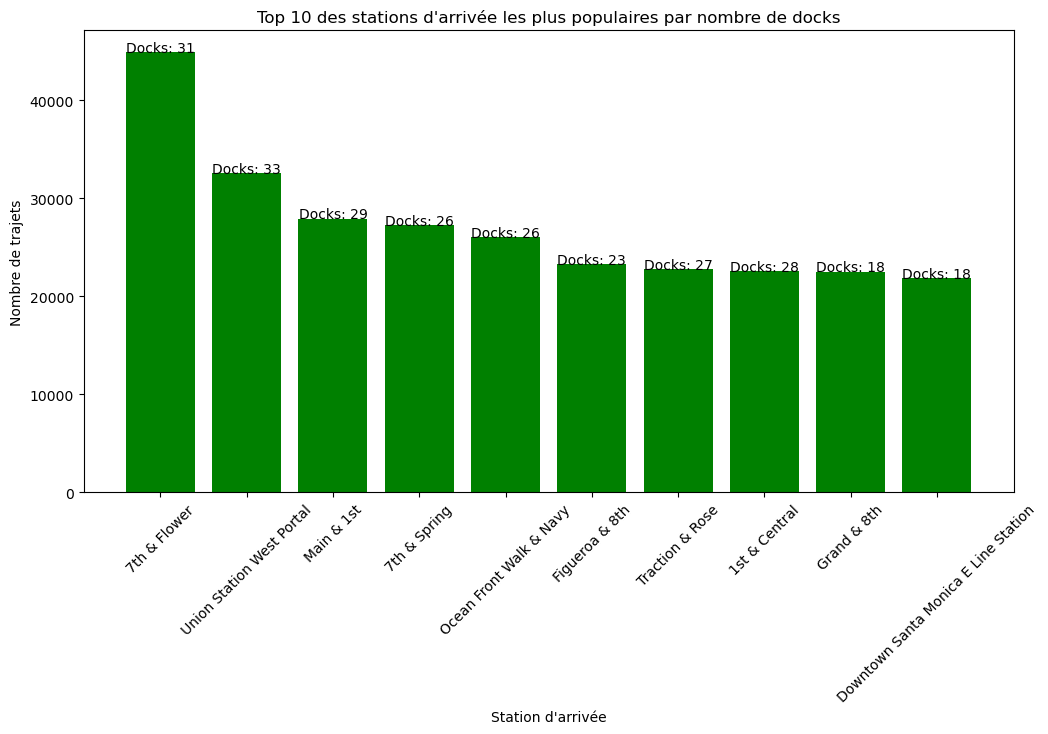

In [1427]:
# affichage d'un histogramme des top 10 des stations d'arrivée les plus populaires par nombre de docks

# affichage des 10 stations d'arrivée les plus populaires
popular_end_stations = data['end_station_name'].value_counts().head(10)

# station et nombre de docks associé
docks_par_station = data.groupby('end_station_name')['end_total_docks'].mean()

# extraction du nombre de docks pour les stations les plus populaires
docks_popular_end_stations = docks_par_station[popular_end_stations.index]

# création de l'histogramme
plt.figure(figsize=(12, 6))
bars = plt.bar(popular_end_stations.index, popular_end_stations.values, color='green')
plt.title('Top 10 des stations d\'arrivée les plus populaires par nombre de docks')
plt.xlabel('Station d\'arrivée')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation=45)

# ajout des annotations du nombre de docks sur chaque barre
for bar, docks in zip(bars, docks_popular_end_stations):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'Docks: {int(docks)}', 
             ha='center', color='black')


plt.show()


==> comme dit précédemment, une augmentation de nombre de docks est nécessaire dans les stations populaires.

## 3.4 Analyse par type d'utilisateur: (passholder_type)

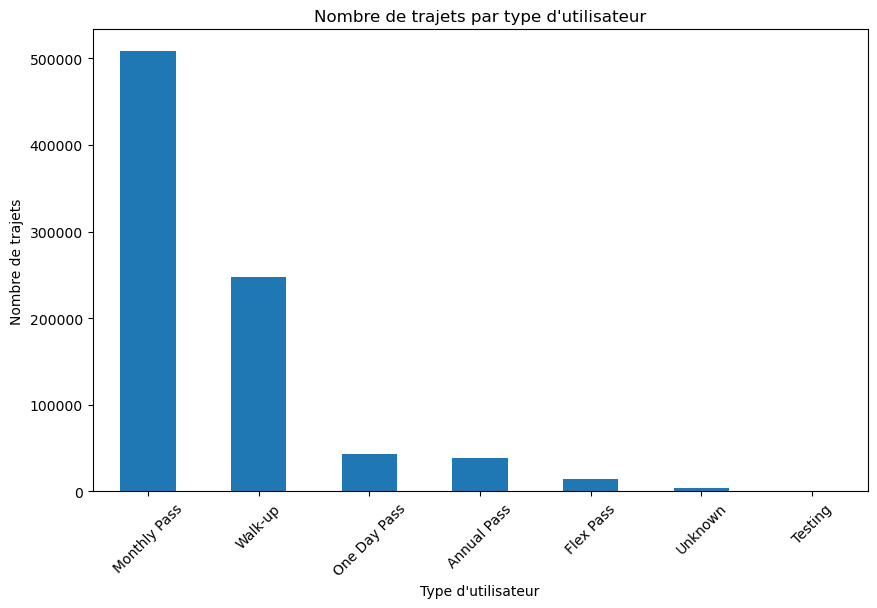

In [1263]:
# calcul du nombre de trajets pour chaque type d'utilisateur
user_types = data['passholder_type'].value_counts()

# création de l'histogramme
plt.figure(figsize=(10, 6))
user_types.plot(kind='bar')
plt.title('Nombre de trajets par type d\'utilisateur')
plt.xlabel('Type d\'utilisateur')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation=45)
plt.show()


==> Le graphique montre que les trajets sont généralement effectués par les utilisateurs avec un abonnement mensuel "Monthly Pass", représentant une large majorité par rapport aux autres types d'utilisateurs.

==> les utilisateurs qui ne sont pas abonnés "Walk up" constituent aussi une part importantes des trajets.

## 3.5 Analyse par type d'utilisateur et durée de trajet: (passholder_type, duration_minutes)

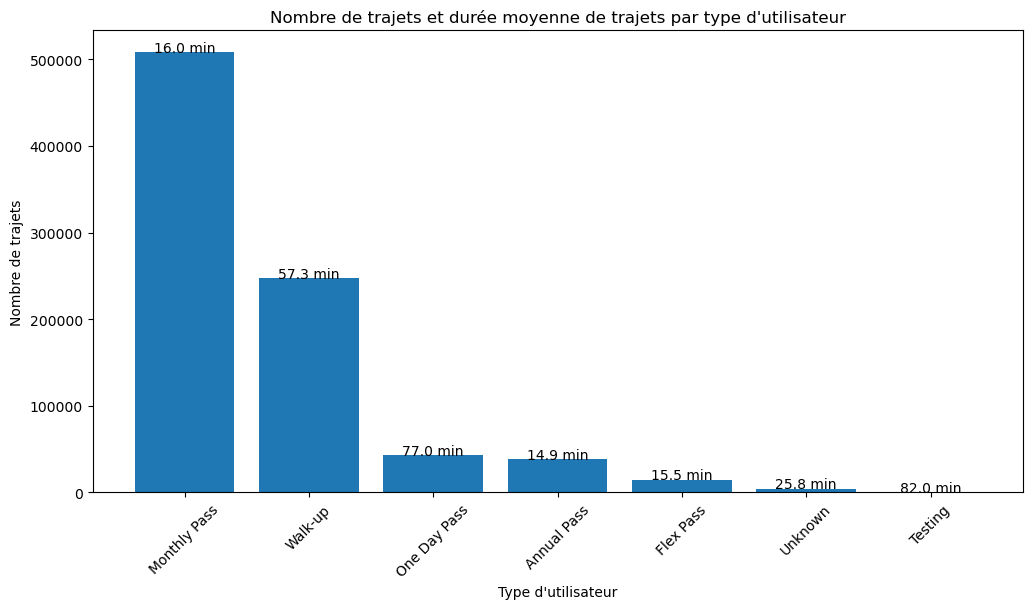

In [1423]:
# calcul du nombre de trajets pour chaque type d'utilisateur
user_types = data['passholder_type'].value_counts()

# calcul la durée moyenne des trajets pour chaque type d'utilisateur
average_duration = data.groupby('passholder_type')['duration_minutes'].mean()

# Créer un graphique en barres pour les types d'utilisateurs
plt.figure(figsize=(12, 6))
bars = plt.bar(user_types.index, user_types.values)
plt.title('Nombre de trajets et durée moyenne de trajets par type d\'utilisateur')
plt.xlabel('Type d\'utilisateur')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation=45)

# ajout de la durée moyenne sur chaque barre
for i, bar in enumerate(bars):
    height = bar.get_height()
    duration = average_duration[user_types.index[i]]
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{duration:.1f} min',ha='center')

plt.show()

==> Le graphique montre que les utilisateurs avec un abonnement mensuel "Monthly Pass" effectuent le plus grand nombre de trajets, avec une durée moyenne de 16.0 minutes, indiquant une utilisation régulière et optimisée pour des trajets courts.

==> Les utilisateurs occasionnels "Walk up" effectuent également un nombre significatif de trajets, mais avec une durée moyenne plus longue de 57.3 minutes, suggérant une utilisation moins fréquente mais pour des trajets plus longs.

==> Les autres types d'utilisateurs, tels que "One Day Pass" et "Annual Pass", ont des nombres de trajets beaucoup plus faibles et des durées moyennes variées, ce qui montre des usages spécifiques et moins fréquents.

## 3.6 Analyse par type d'utilisateur et station de départ: (passholder_type, start_station_name)

<Figure size 1400x800 with 0 Axes>

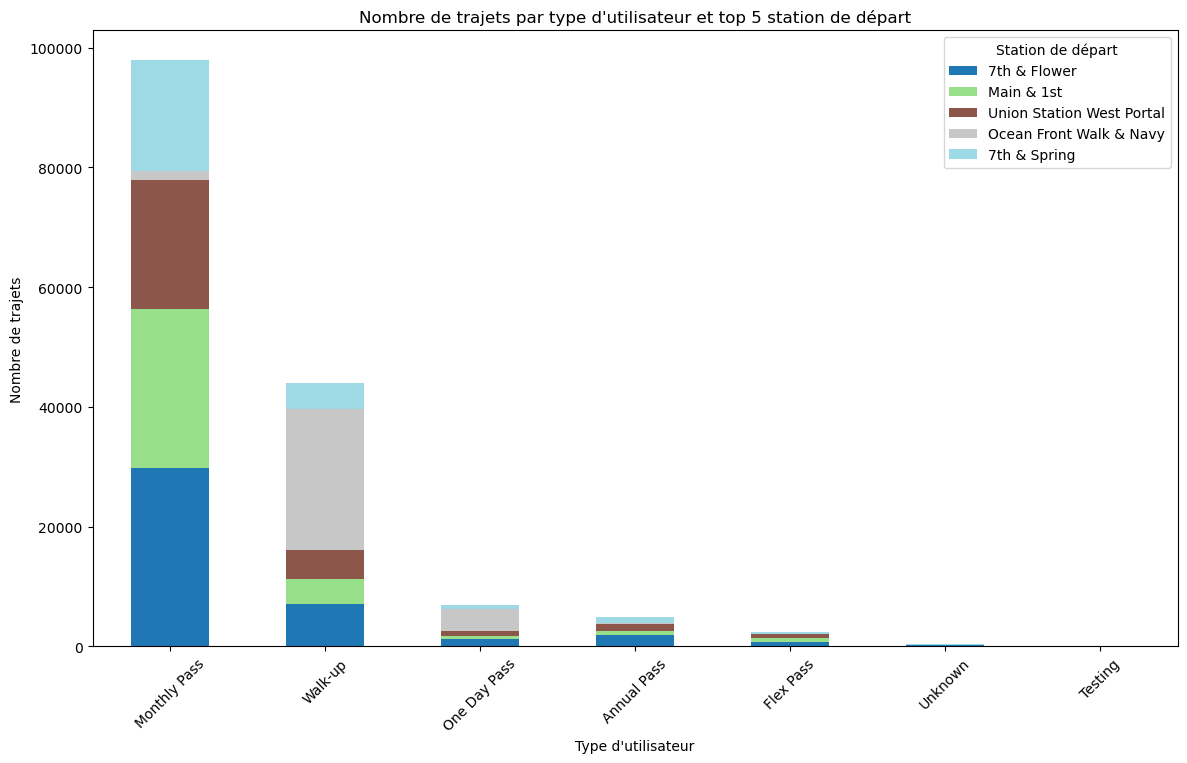

In [1411]:
# calcul du nombre de trajets par type d'utilisateur et station de départ
user_station_counts = data.groupby(['passholder_type', 'start_station_name']).size().unstack(fill_value=0)

# affichage du top 5 stations les plus utilisées pour simplifier la visualisation
top_stations = user_station_counts.sum().nlargest(5).index
user_station_counts = user_station_counts[top_stations]

# calcul du nombre total des trajets par type d'utilisateur pour l'ordre
total_trajets_par_utilisateur = user_station_counts.sum(axis=1).sort_values(ascending=False)

# calcul du nombre total de trajets par type d'utilisateur
user_station_counts = user_station_counts.loc[total_trajets_par_utilisateur.index]

# création d'un graphique en barres empilées avec les types d'utilisateurs sur l'axe des x
plt.figure(figsize=(14, 8))
user_station_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Nombre de trajets par type d\'utilisateur et top 5 station de départ')
plt.xlabel('Type d\'utilisateur')
plt.ylabel('Nombre de trajets')
plt.legend(title='Station de départ', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

==> ce graphique combine les résulats déjà obtenus précédemment.

Plusieurs propositions à mettre en place pour améliorer le service de Metro Bike Share :

1. Les "Monthly Pass":
- Selon le graphique je propose une augmentation du nombre des vélos et de docks dans les stations "7th & Flower", "Main & 1st" et "Union Station West Portal".
  
2. Les "Walk up":
- Je propose une augmentation de vélos et de docks dans la station "Ocean Front Walk & Navy".
- Les "Walk up" sont probablement des touristes, donc je suggère d'ajouter des informations en plusieurs langues dans les stations les plus fréquentés par ce type d'utilisateur pour améliorer l'expérience client.
- Ajouter le paiement en carte bleu et en espèces dans ces stations, pour qu'ils ne trouvent aucun problème à ce niveau.   

## 3.7 Analyse par type de vélo: (bike_type)

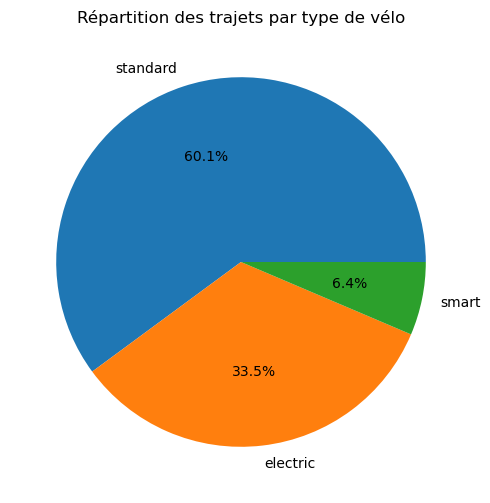

In [1272]:
# filtrage des données pour exclure les vélos de type 'Unknown'
bike_type_different_unknown = data[data['bike_type'] != 'Unknown']


# calcul du nombre de trajets pour chaque type de vélo
bike_types = bike_type_different_unknown['bike_type'].value_counts()

# création d'un graphique en secteurs pour les types de vélos
plt.figure(figsize=(6, 6))
bike_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des trajets par type de vélo')
plt.ylabel('')  # Enlever le label de l'axe y
plt.show()

## 3.8 Analyse par type de vélo et type d'utilisateur: (bike_type, passholder_type)

<Figure size 1400x800 with 0 Axes>

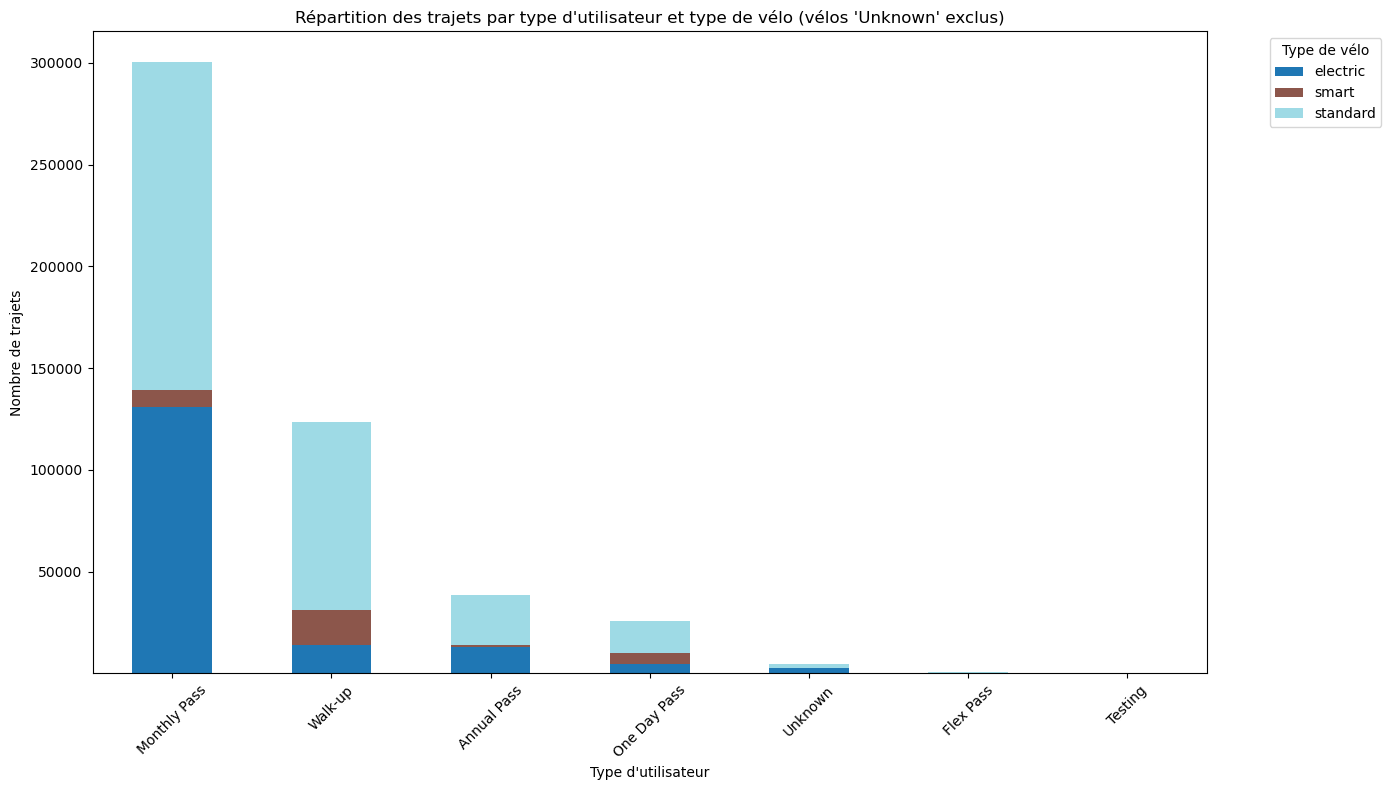

In [1415]:
# calcul du nombre de trajets pour chaque combinaison de type d'utilisateur et type de vélo
user_bike_counts = bike_type_different_unknown.groupby(['passholder_type', 'bike_type']).size().unstack(fill_value=0)

# calcul du total des trajets par type d'utilisateur pour l'ordre
total_trajets_par_utilisateur = user_bike_counts.sum(axis=1).sort_values(ascending=False)

# le nombre total de trajets par type d'utilisateur
user_bike_counts = user_bike_counts.loc[total_trajets_par_utilisateur.index]

# création d'un graphique en barres empilées pour les types d'utilisateurs et types de vélos
plt.figure(figsize=(14, 8))
bars = user_bike_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Répartition des trajets par type d\'utilisateur et type de vélo (vélos \'Unknown\' exclus)')
plt.xlabel('Type d\'utilisateur')
plt.ylabel('Nombre de trajets')
plt.legend(title='Type de vélo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


==> Cette analyse complète les précédentes, qui ont identifié les stations où il faut ajouter des vélos. Ce graphique permet de déterminer quel type de vélo ajouter dans ces stations. On constate que les vélos standards sont les plus populaires auprès des utilisateurs, suivis par les vélos électriques en 2ème position.

==> D'après les analyses précédentes, les utilisateurs de type "Walk-up", "Annual Pass", et "One Day Pass" effectuent des trajets plus longs. Il serait donc préférable de leur proposer davantage de vélos électriques et smart, car ils sont plus adaptés et confortables pour des trajets de longue durée.

==> Pour résumer:
- Pour les utilisateurs "Monthly Pass" :
Ajouter plus de vélos standard dans les stations "7th & Flower", "Main & 1st" et "Union Station West Portal".

- Pour les utilisateurs "Walk up" et "Annual Pass" 
Ajouter plus de vélos électric et smart dans les stations "Ocean Front Walk & Navy" et "7th & Flower".

## 3.9 Analyse par région de départ: (start_region)

In [1278]:
# affichage des différentes valeurs de start_region
data['start_region'].unique()

array(['DTLA', 'Westside', 'North Hollywood'], dtype=object)

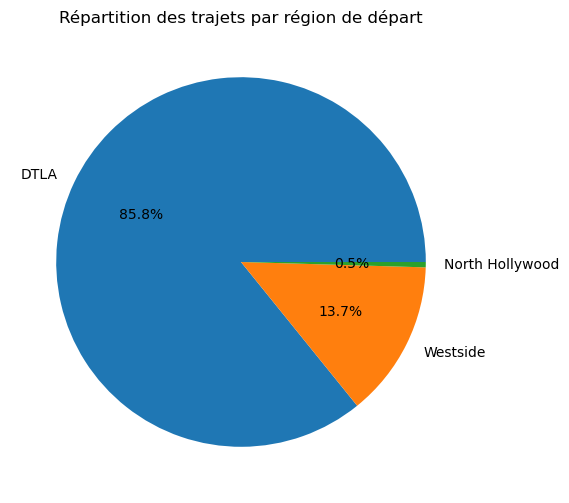

In [1330]:
# calcul du nombre de trajets pour chaque région de départ
region_counts = data['start_region'].value_counts()

# création du graphique en secteur pour les régions de départ
plt.figure(figsize=(8,6))
region_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des trajets par région de départ')
plt.ylabel('')  # supprimer label y
plt.show()

==> Le graphique montre que la majorité des trajets commencent dans la région de DTLA (85.8%), suggérant un fort besoin de renforcer la disponibilité des vélos dans cette zone pour mieux répondre à la demande.

==> Ma proposition d'amélioration de services : Augmenter le nombre de vélos et de stations dans la région DTLA pour répondre à la forte demande et améliorer la disponibilité pour les utilisateurs.

## 3.10 Analyse par région d'arrivée: (end_region)

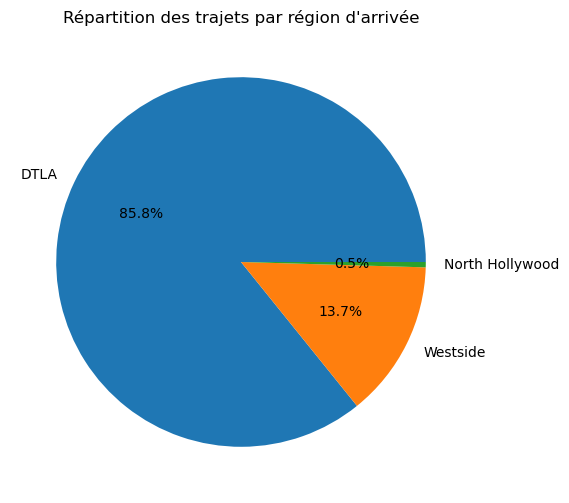

In [1345]:
# calcul du nombre de trajets pour chaque région d'arrivée
region_counts = data['end_region'].value_counts()

# création du graphique en secteur pour les régions de départ
plt.figure(figsize=(8,6))
region_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des trajets par région d\'arrivée')
plt.ylabel('')  # supprimer label y
plt.show()

==> Le graphique montre que la majorité des trajets se terminent dans la région de DTLA (85.8%).

==> Ma proposition d'amélioration de services : Augmenter le nombre de stations et de docks dans la région DTLA pour répondre à la forte demande et améliorer ainsi la satisfaction client.

## 3.11 Analyse par latitude et longétude de départ: (start_lat, start_lon)

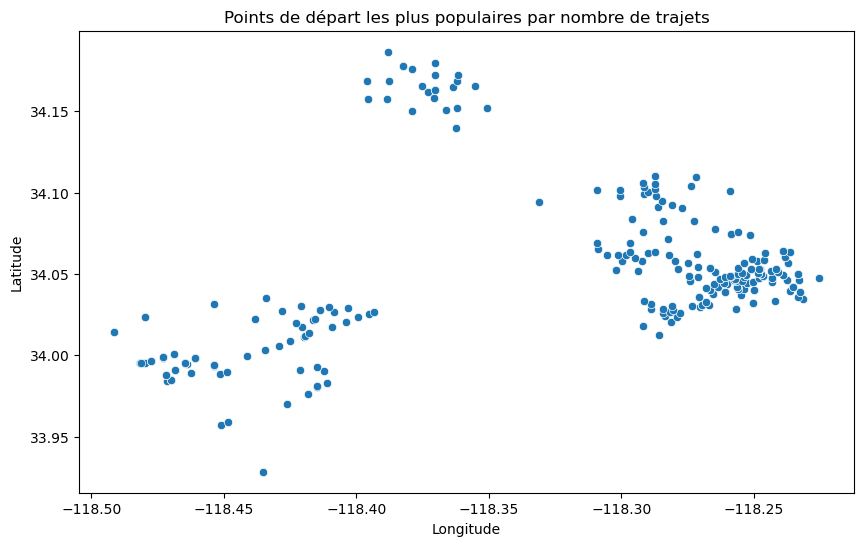

In [1409]:
# comptage du nombre de trajets pour chaque combinaison de latitude et longitude
location_counts = data.groupby(['start_lat', 'start_lon']).size().reset_index(name='trip_count')

# création du scatter plot de coordonnées géographiques de départ
plt.figure(figsize=(10, 6))
sns.scatterplot(data=location_counts, x='start_lon', y='start_lat',sizes=(20, 200), legend=False)
plt.title('Points de départ les plus populaires par nombre de trajets')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

==> Le graphique montre que les points de départ des trajets sont concentrés dans des clusters géographiques, et les zones fréquentées sont l'est centre.

==> Ma proposition d'amélioration de services : 
- Augmenter le nombre de vélos et de stations dans la zone est centre pour répondre à la forte demande et améliorer la disponibilité pour les utilisateurs.
- ces coordonnées géographiques peuvent être utilisées dans des applications de cartographie pour visualiser la répartition des trajets et optimiser l'emplacement des stations pour améliorer l'accessibilité aux services.

## 3.12 Analyse par latitude et longétude d'arrivée : (end_lat, end_lon)

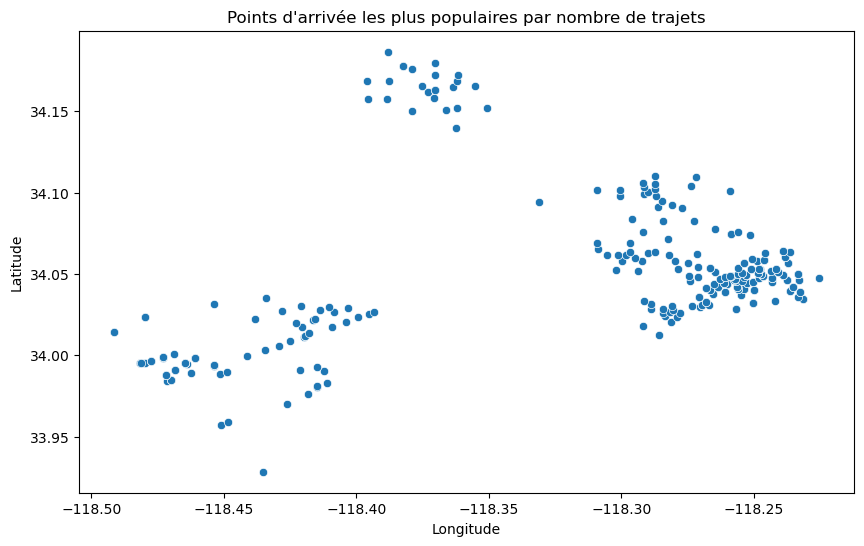

In [1355]:
# comptage du nombre de trajets pour chaque combinaison de latitude et longitude
location_counts = data.groupby(['end_lat', 'end_lon']).size().reset_index(name='trip_count')

# création du scatter plot de coordonnées géographiques d'arrivée
plt.figure(figsize=(10, 6))
sns.scatterplot(data=location_counts, x='end_lon', y='end_lat',sizes=(20, 200), legend=False)
plt.title('Points d\'arrivée les plus populaires par nombre de trajets')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

==> Le graphique montre que les points d'arrivée des trajets sont concentrés dans des clusters géographiques, et les zones fréquentées sont l'est centre.

==> Ma proposition d'amélioration de services : 
- Augmenter le nombre de stations et docks dans la zone est centre pour répondre à la forte demande et améliorer la disponibilité pour les utilisateurs.
- ces coordonnées géographiques peuvent être utilisées dans des applications de cartographie pour visualiser la répartition des trajets et optimiser l'emplacement des stations pour améliorer l'accessibilité aux services.

## 3.13 Analyse par catégorie de trajet et type d'utilisateur  : (passholder_type, trip_route_category)

<Figure size 800x600 with 0 Axes>

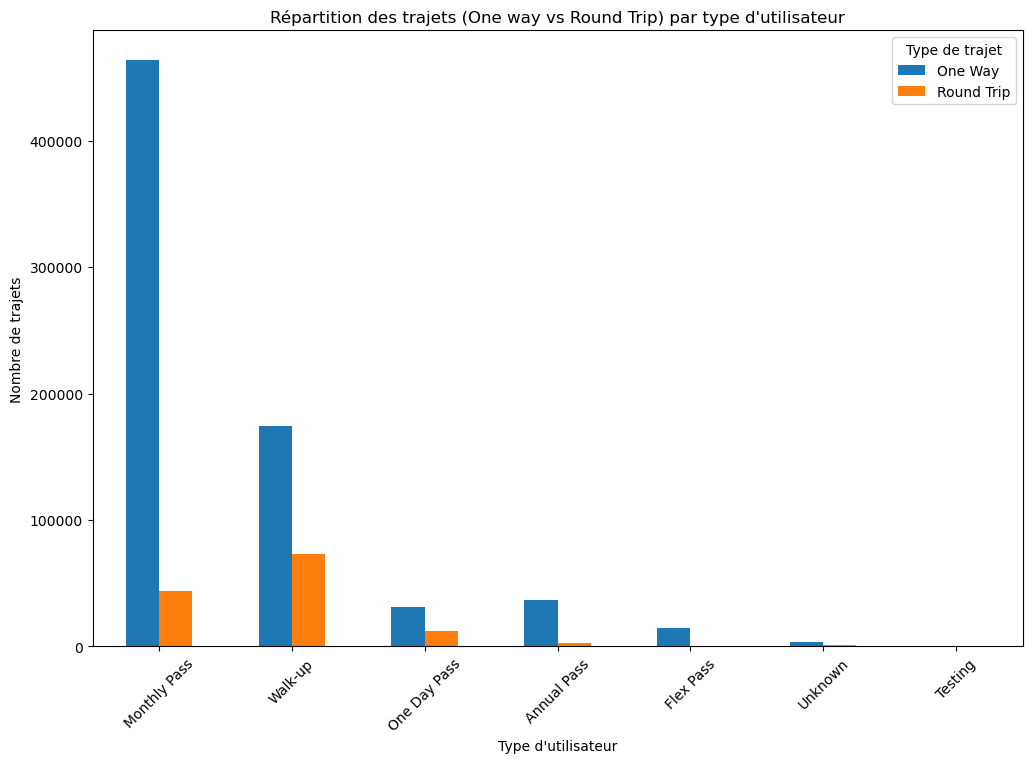

In [1431]:
# groupement des données par 'passholder_type' et 'trip_route_category' pour compter les occurrences
user_trip_counts = data.groupby(['passholder_type', 'trip_route_category']).size().unstack(fill_value=0)

# calcul du total des trajets par type d'utilisateur par ordre descendant
total_trajets_par_utilisateur = user_trip_counts.sum(axis=1).sort_values(ascending=False)

# réorganisation des données selon le nombre de trajets par type d'utilisateur
user_trip_counts = user_trip_counts.loc[total_trajets_par_utilisateur.index]

# création d'un graphique en barres pour visualiser les types de trajets par type d'utilisateur
plt.figure(figsize=(8, 6))
user_trip_counts.plot(kind='bar', figsize=(12, 8))

# Ajouter des titres et des étiquettes
plt.title('Répartition des trajets (One way vs Round Trip) par type d\'utilisateur')
plt.xlabel('Type d\'utilisateur')
plt.ylabel('Nombre de trajets')
plt.legend(title='Type de trajet', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.show()


==> Les utilisateurs "Monthly Pass" font principalement des trajets "one way" plutôt que les trajets "round trip" ce qui signifie que ce sont des trajets directs.

==> les utilisateurs "walk up" et "one day pass" montrent une utilisation équilibré entre "one way" et "round trip" ce qui peut signifier une balade ou une promenade en vélo.


==> Ma proposition d'amélioration de services est de mettre en place des personnes responsables de réallocation des vélos pour ne pas avoir des pénuries dans les stations les plus populaires.